# **Problem Statment**

Dataset:ToyotaCorolla.csv

Consider only the below columns and prepare a prediction model for predicting Price.


Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

 







# **Importing libraries**

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
%matplotlib inline

In [88]:
import warnings
warnings.filterwarnings('ignore')

# **Importing Dataset**

In [89]:
df=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')

In [90]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [91]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [92]:
df.drop(['Id','Model','Mfg_Month','Mfg_Year','Fuel_Type','Met_Color','Color','Automatic','Cylinders','Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],axis = 1,inplace = True) 

In [93]:
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# **Performing EDA**

In [94]:
df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [96]:
df.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

By seeing this we will get to know that there is no null values in the dataset.

In [97]:
df.shape

(1436, 9)

In [98]:
#checking for duplicates
df[df.duplicated()].shape

(1, 9)

In [99]:
df=df.drop_duplicates().reset_index(drop=True)
df

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


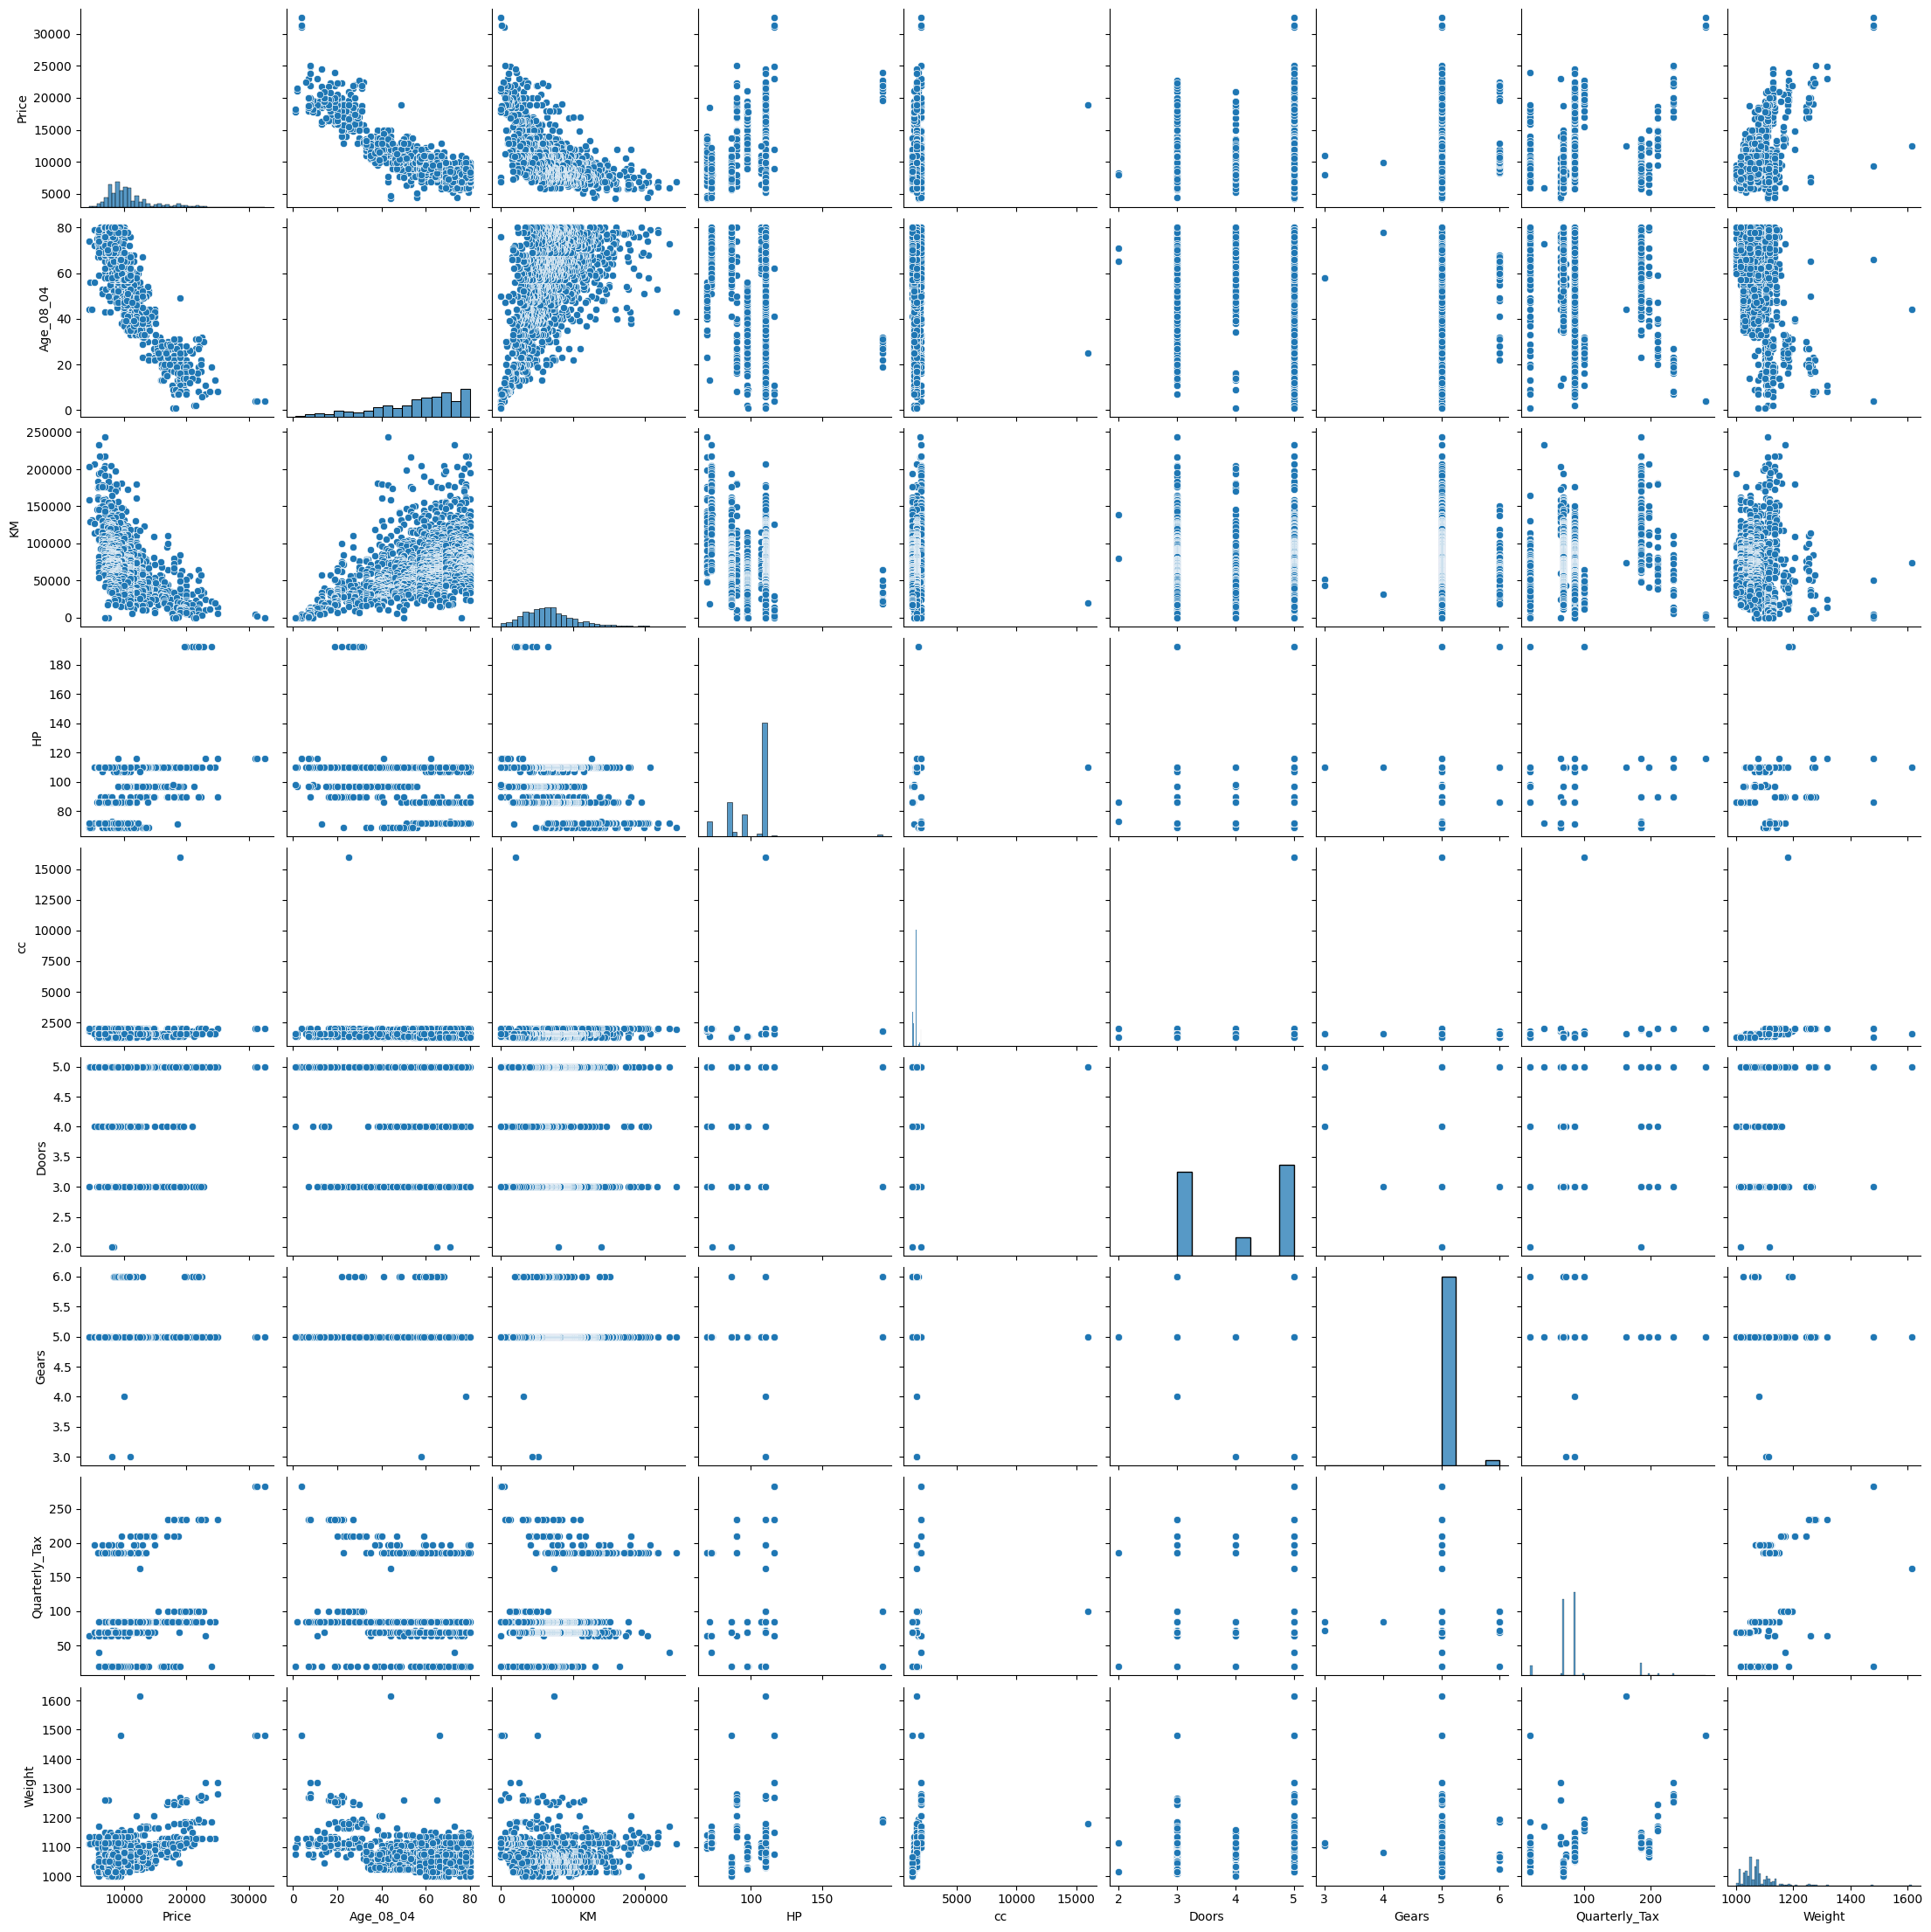

In [100]:
sns.pairplot(df)

In [101]:
df.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


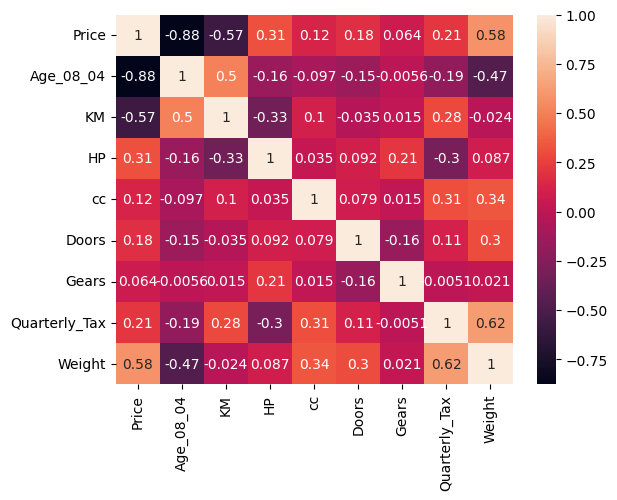

In [102]:
sns.heatmap(df.corr(),annot=True)
plt.show()

<Axes: >

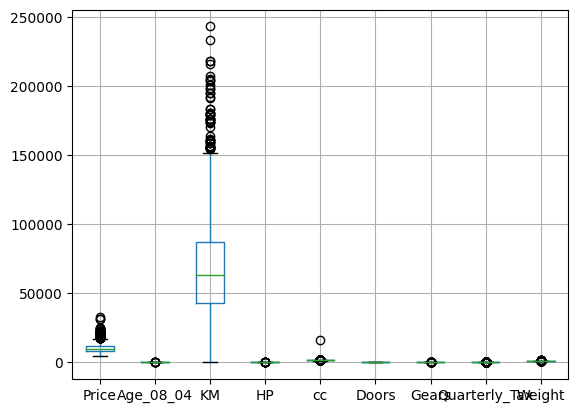

In [103]:
#checking for the outliers
df.boxplot()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc257c01cf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc257c02110>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc257c01a50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc257c02650>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc257c028f0>],
 'means': []}

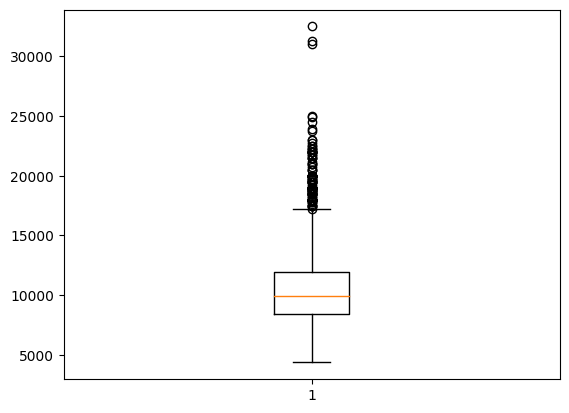

In [104]:
box = plt.boxplot(df['Price'])
box

In [105]:
[item.get_ydata() for item in box['fliers']]


[array([18600, 21500, 20950, 19950, 19600, 21500, 22500, 22000, 22750,
        17950, 17495, 17950, 19000, 17950, 17950, 21950, 17950, 20500,
        21950, 18950, 18750, 17950, 17950, 18950, 22250, 18950, 19950,
        18750, 18450, 18950, 17250, 17950, 17450, 17950, 21950, 22250,
        19950, 18900, 19950, 18750, 17450, 18990, 18500, 18500, 19450,
        18800, 17450, 17950, 32500, 31000, 31275, 24950, 22950, 24990,
        21950, 17900, 19250, 22250, 18950, 19950, 18950, 21750, 17950,
        18450, 23000, 19900, 23950, 19950, 18500, 18950, 20500, 24500,
        19450, 20950, 19950, 18450, 19500, 21750, 19500, 18900, 19750,
        19750, 18950, 20750, 19600, 19500, 17650, 19950, 19950, 20950,
        20500, 17795, 18245, 23750, 19500, 18950, 21950, 19950, 18950,
        19950, 21950, 22500, 18500, 18700, 21125, 21500, 17795, 18245,
        18950])]

In [106]:
df[df['Price']>=30000]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
109,32500,4,1,116,2000,5,5,283,1480
110,31000,4,4000,116,2000,5,5,283,1480
111,31275,4,1500,116,2000,5,5,283,1480


In [107]:
df.drop([109,110,111],axis=0,inplace = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc257c57790>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc257c57cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc257c574f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc257c80250>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc257c804f0>],
 'means': []}

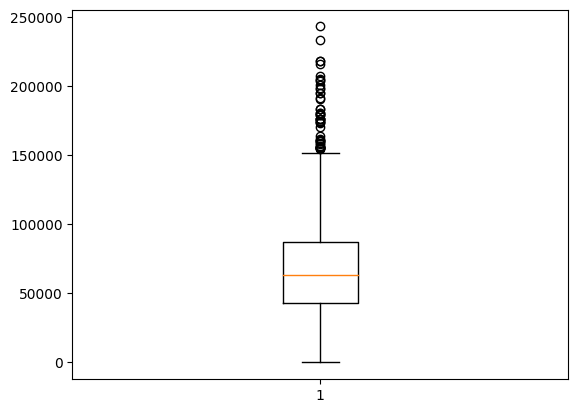

In [108]:
box1 = plt.boxplot(df['KM'])
box1

In [109]:
df[df['KM']>=230000]


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
185,6950,43,243000,69,1900,3,5,185,1110
1043,5900,73,232940,72,2000,5,5,40,1172


In [110]:
df.drop([186,1044],axis = 0,inplace = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc257cca020>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc257cca440>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc257cc9d80>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc257cca980>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc257ccac20>],
 'means': []}

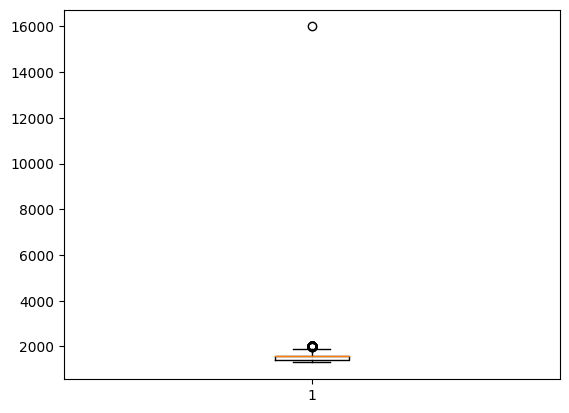

In [111]:
box2 = plt.boxplot(df['cc'])
box2


In [112]:
[item.get_ydata() for item in box2['fliers']]


[array([ 2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000, 16000,  2000,  2000,
         2000,  1995,  1995,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  1975,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,
         2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000,  2000])]

In [113]:
df[df['cc']>=16000]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [114]:
df.drop(80, axis = 0,inplace = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc257b49690>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc257b49bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc257b493f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc257b4a110>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc257b4a3b0>],
 'means': []}

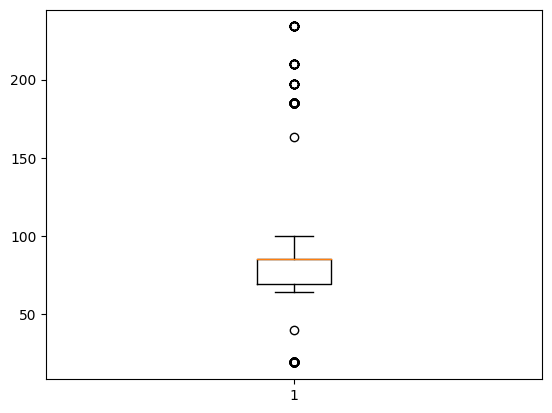

In [115]:
box3 = plt.boxplot(df['Quarterly_Tax'])
box3

In [116]:
[item.get_ydata() for item in box3['fliers']]


[array([ 19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,
         19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,
         19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,
         19,  19,  19,  19,  19,  19,  19,  19,  40,  19,  19,  19,  19,
         19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,  19,
         19,  19,  19,  19,  19,  19,  19,  19, 210, 210, 210, 210, 210,
        210, 210, 210, 185, 234, 234, 234, 234, 234, 234, 234, 210, 234,
        234, 234, 234, 234, 234, 234, 234, 234, 234, 234, 185, 210, 197,
        185, 185, 185, 185, 210, 197, 185, 185, 197, 185, 210, 210, 185,
        163, 197, 210, 210, 185, 185, 197, 185, 185, 185, 185, 185, 185,
        185, 197, 185, 185, 185, 210, 185, 185, 185, 185, 185, 185, 197,
        185, 185, 185, 185, 185, 185, 185, 185, 185, 185, 185, 185, 185,
        185, 185, 185, 185, 197, 197, 185, 185, 185, 185, 185, 185, 185,
        185, 185, 185, 185, 185, 185, 197, 197, 185

In [117]:
df[df['Quarterly_Tax']<50]


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
18,16750,24,25563,110,1600,3,5,19,1065
30,12950,29,9750,97,1400,3,5,19,1100
65,16950,26,32181,110,1600,5,5,19,1075
125,15950,20,36000,110,1600,5,5,19,1075
128,15850,13,33477,110,1600,5,5,19,1075
...,...,...,...,...,...,...,...,...,...
1386,7450,78,52287,110,1600,5,5,19,1114
1387,8750,75,52000,110,1600,5,5,19,1075
1415,8950,79,40093,110,1600,5,5,19,1114
1422,7950,80,35821,86,1300,3,5,19,1015


In [118]:
df.reset_index()

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1424,1430,7500,69,20544,86,1300,3,5,69,1025
1425,1431,10845,72,19000,86,1300,3,5,69,1015
1426,1432,8500,71,17016,86,1300,3,5,69,1015
1427,1433,7250,70,16916,86,1300,3,5,69,1015


In [119]:
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# **Preparing a model**

In [120]:
def model_check(string,data):
    X=smf.ols(string,data).fit()
    return(X.summary())

In [121]:
model1 = model_check("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = df)
model1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1110.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        19:20:00   Log-Likelihood:                -12264.
No. Observations:                1429   AIC:                         2.455e+04
Df Residuals:                    1420   BIC:                         2.459e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4202.7893   1403.666     -2.994      0.003   -6956.271   -1449.307
Age_08_04      -122.7393      2.553    -48.076      0.000    -127.747    -117.731
KM               -0.0172      0.001    -13.536      0.000      -0.020      -0.015
HP               38.1940      2.884     13.245      0.000      32.537      43.851
cc               -2.1291      0.310     -6.862      0.000      -2.738      -1.520
Doors            -7.1865     38.905     -0.185      0.853     -83.504      69.130
Gears           561.9552    190.491      2.950      0.003     188.282     935.628
Quarterly_Tax     8.0239      1.420      5.652      0.000       5.239      10.809
Weight           17.6528      1.172     15.058      0.000      15.353      19.952
==============================================================================
Omnibus:                      172.471   Durbin-Watson:                   1.602
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1380.927
Skew:                          -0.239   Prob(JB):                    1.37e-300
Kurtosis:                       7.792   Cond. No.                     3.21e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**As per the above model, the p value of the doors is greater than 0.05 so it is insignificant.so now check it individually.**

In [122]:
model2 = model_check('Price~Doors',data=df)
model2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     46.40
Date:                Wed, 31 May 2023   Prob (F-statistic):           1.42e-11
Time:                        19:20:00   Log-Likelihood:                -13657.
No. Observations:                1429   AIC:                         2.732e+04
Df Residuals:                    1427   BIC:                         2.733e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8064.6474    393.764     20.481      0.000    7292.230    8837.065
Doors        647.7870     95.101      6.812      0.000     461.234     834.340
==============================================================================
Omnibus:                      361.235   Durbin-Watson:                   0.295
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              758.619
Skew:                           1.447   Prob(JB):                    1.85e-165
Kurtosis:                       5.090   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**As we can see above individually doors feature is important.**

**As HP and Doors are highly corelated with each other .so now lets check HP individually.**

In [138]:
model3 = model_check('Price~HP',data=df)
model3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     154.5
Date:                Wed, 31 May 2023   Prob (F-statistic):           9.25e-34
Time:                        19:50:48   Log-Likelihood:                -13606.
No. Observations:                1429   AIC:                         2.722e+04
Df Residuals:                    1427   BIC:                         2.723e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3304.7284    599.289      5.514      0.000    2129.147    4480.310
HP            72.6232      5.842     12.431      0.000      61.163      84.083
==============================================================================
Omnibus:                      330.933   Durbin-Watson:                   0.345
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              650.152
Skew:                           1.364   Prob(JB):                    6.63e-142
Kurtosis:                       4.864   Cond. No.                         703.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**As we can see above individually HP feature is important.now lets see cobination of them**

In [139]:
model4 = model_check('Price~Doors+HP',data=df)
model4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     97.31
Date:                Wed, 31 May 2023   Prob (F-statistic):           2.43e-40
Time:                        19:50:49   Log-Likelihood:                -13588.
No. Observations:                1429   AIC:                         2.718e+04
Df Residuals:                    1426   BIC:                         2.720e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1417.9058    669.815      2.117      0.034     103.978    2731.834
Doors        548.3612     91.058      6.022      0.000     369.740     726.983
HP            69.4430      5.795     11.983      0.000      58.075      80.811
==============================================================================
Omnibus:                      312.446   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              589.992
Skew:                           1.313   Prob(JB):                    7.67e-129
Kurtosis:                       4.735   Cond. No.                         798.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**As we can see above the comination of HP and Doors is also significant.**

In [140]:
model5= model_check("Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight",data = df)
model5

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1269.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        19:50:49   Log-Likelihood:                -12264.
No. Observations:                1429   AIC:                         2.454e+04
Df Residuals:                    1421   BIC:                         2.459e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4205.0229   1403.137     -2.997      0.003   -6957.465   -1452.581
Age_08_04      -122.7452      2.552    -48.098      0.000    -127.751    -117.739
KM               -0.0172      0.001    -13.561      0.000      -0.020      -0.015
HP               38.1410      2.868     13.297      0.000      32.514      43.768
cc               -2.1234      0.309     -6.879      0.000      -2.729      -1.518
Gears           568.8274    186.759      3.046      0.002     202.475     935.180
Quarterly_Tax     8.0290      1.419      5.658      0.000       5.246      10.813
Weight           17.5930      1.126     15.622      0.000      15.384      19.802
==============================================================================
Omnibus:                      170.988   Durbin-Watson:                   1.601
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1358.003
Skew:                          -0.235   Prob(JB):                    1.30e-295
Kurtosis:                       7.752   Cond. No.                     3.21e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**In the model 5, I have keep HP and remove Doors then I got Rsquared value as 86.2%**

In [141]:
model6= model_check("Price~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight",data = df)
model6

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     1107.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        19:50:50   Log-Likelihood:                -12347.
No. Observations:                1429   AIC:                         2.471e+04
Df Residuals:                    1421   BIC:                         2.475e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6257.1579   1478.216     -4.233      0.000   -9156.879   -3357.437
Age_08_04      -122.3880      2.705    -45.244      0.000    -127.694    -117.082
KM               -0.0217      0.001    -16.684      0.000      -0.024      -0.019
cc               -0.7239      0.309     -2.343      0.019      -1.330      -0.118
Doors            44.1480     41.018      1.076      0.282     -36.315     124.611
Gears          1179.3616    195.707      6.026      0.000     795.455    1563.268
Quarterly_Tax    -0.7596      1.330     -0.571      0.568      -3.369       1.850
Weight           19.0218      1.237     15.373      0.000      16.595      21.449
==============================================================================
Omnibus:                      215.034   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2074.855
Skew:                          -0.364   Prob(JB):                         0.00
Kurtosis:                       8.858   Cond. No.                     3.19e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**In the model 6, I have keep Doors and remove HP then I got Rsquared value as 84.5%**

**conclusion : as seen above tunning of features we will get to know tha Doors feature is not much significant for our model so we can remove this feature from final model.**

# **Calculating VIF value for checking the Multicollinearity**

In [143]:
rsq_1 = smf.ols ('Age_08_04~KM+HP+Doors+cc+Gears+Weight',data=df).fit().rsquared  
vif_1 = 1/(1-rsq_1) 

rsq_2 = smf.ols ('KM~Age_08_04+HP+Doors+cc+Gears+Weight',data=df).fit().rsquared  
vif_2 = 1/(1-rsq_2) 

rsq_3 = smf.ols ('HP~Age_08_04+KM+Doors+cc+Gears+Weight',data=df).fit().rsquared  
vif_3 = 1/(1-rsq_3) 

rsq_4 = smf.ols ('Doors~Age_08_04+KM+HP+cc+Gears+Weight',data=df).fit().rsquared  
vif_4 = 1/(1-rsq_4)

rsq_5 = smf.ols ('cc~Age_08_04+KM+HP+Doors+Gears+Weight',data=df).fit().rsquared  
vif_5 = 1/(1-rsq_5)

rsq_6 = smf.ols ('Gears~Age_08_04+KM+HP+Doors+cc+Weight',data=df).fit().rsquared  
vif_6 = 1/(1-rsq_6)

rsq_7 = smf.ols ('Weight~Age_08_04+KM+HP+Doors+cc+Gears',data=df).fit().rsquared  
vif_7 = 1/(1-rsq_7)

# Storing vif values in a data frame
df1 = {'Variables': ['Age_08_04','KM','HP','Doors','cc','Gears','Weight'],
        'VIF':[vif_1,vif_2,vif_3,vif_4,vif_5,vif_6,vif_7]}
Vif_frame = pd.DataFrame(df1)  
Vif_frame

,Variables,VIF
0,Age_08_04,1.860760
1,KM,1.874369
2,HP,1.240251
3,Doors,1.169164
4,cc,2.212535
5,Gears,1.098065
6,Weight,2.568210


**Since all VIF's are below 5,hence there's no Multicollinearity among the features**

# **Residual Analysis**

In [144]:
model_r=smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = df).fit()
model_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1110.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        20:14:50   Log-Likelihood:                -12264.
No. Observations:                1429   AIC:                         2.455e+04
Df Residuals:                    1420   BIC:                         2.459e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4202.7893   1403.666     -2.994      0.003   -6956.271   -1449.307
Age_08_04      -122.7393      2.553    -48.076      0.000    -127.747    -117.731
KM               -0.0172      0.001    -13.536      0.000      -0.020      -0.015
HP               38.1940      2.884     13.245      0.000      32.537      43.851
cc               -2.1291      0.310     -6.862      0.000      -2.738      -1.520
Doors            -7.1865     38.905     -0.185      0.853     -83.504      69.130
Gears           561.9552    190.491      2.950      0.003     188.282     935.628
Quarterly_Tax     8.0239      1.420      5.652      0.000       5.239      10.809
Weight           17.6528      1.172     15.058      0.000      15.353      19.952
==============================================================================
Omnibus:                      172.471   Durbin-Watson:                   1.602
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1380.927
Skew:                          -0.239   Prob(JB):                    1.37e-300
Kurtosis:                       7.792   Cond. No.                     3.21e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [145]:
y_pred=model_r.predict()

In [146]:
#calculating error using actual value-predicted value
df['Price']-y_pred

0      -2883.870461
1      -2187.362664
2      -2401.891798
3      -1048.205952
4      -2008.968183
           ...     
1430   -1427.632920
1431    2435.547543
1432     -66.328045
1433   -1440.787900
1434   -2905.384552
Name: Price, Length: 1429, dtype: float64

In [147]:
#calculating the errors using resid
model_r.resid

0      -2883.870461
1      -2187.362664
2      -2401.891798
3      -1048.205952
4      -2008.968183
           ...     
1430   -1427.632920
1431    2435.547543
1432     -66.328045
1433   -1440.787900
1434   -2905.384552
Length: 1429, dtype: float64

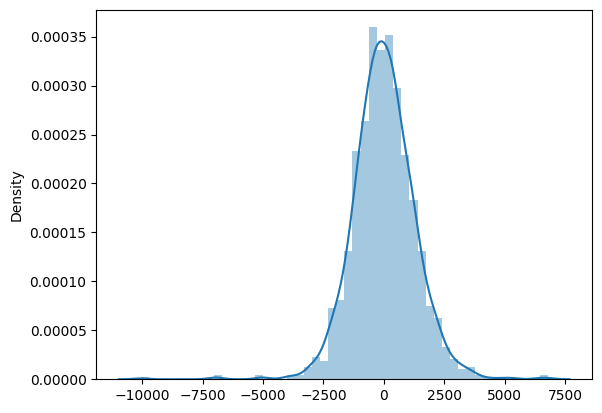

In [148]:
sns.distplot(model_r.resid)
plt.show()

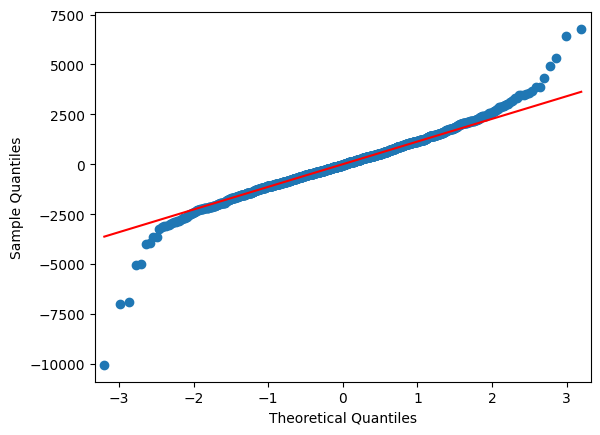

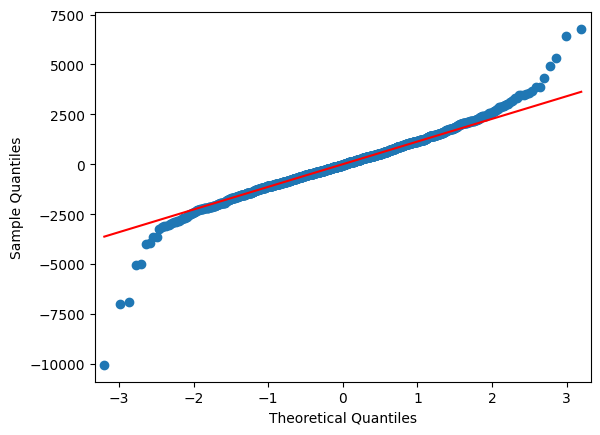

In [149]:
import statsmodels.api as sm
sm.qqplot(model_r.resid,line='q')

In [153]:
list(np.where(model_r.resid>5000 ))

[array([ 142,  517, 1051])]

In [155]:
list(np.where(model_r.resid<-5000 ))

[array([185, 186, 215, 595, 954])]

In [157]:
model_rd=smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = df.drop([142,  517, 1051,185, 215, 595, 954])).fit()
model_rd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1104.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        20:22:07   Log-Likelihood:                -12204.
No. Observations:                1422   AIC:                         2.443e+04
Df Residuals:                    1413   BIC:                         2.447e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4110.5230   1405.859     -2.924      0.004   -6868.318   -1352.728
Age_08_04      -122.9277      2.569    -47.856      0.000    -127.967    -117.889
KM               -0.0170      0.001    -13.258      0.000      -0.020      -0.015
HP               38.3044      2.887     13.268      0.000      32.641      43.968
cc               -2.1342      0.311     -6.864      0.000      -2.744      -1.524
Doors            -8.5503     38.965     -0.219      0.826     -84.985      67.885
Gears           557.3283    190.461      2.926      0.003     183.712     930.945
Quarterly_Tax     8.0392      1.420      5.662      0.000       5.254      10.825
Weight           17.5911      1.174     14.980      0.000      15.287      19.895
==============================================================================
Omnibus:                      171.329   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1375.149
Skew:                          -0.236   Prob(JB):                    2.46e-299
Kurtosis:                       7.794   Cond. No.                     3.19e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **Checking for Homoscadacity:**

i.e error and target do not have any pattern.

In [158]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

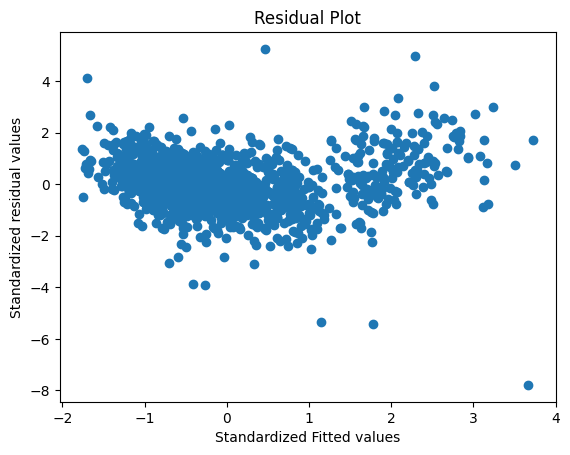

In [159]:
plt.scatter(get_standardized_values(model_r.fittedvalues),
            get_standardized_values(model_r.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# **Checking for Residual vs Regressor:**

i.e Error and feature do not have any pattern

eval_env: 1


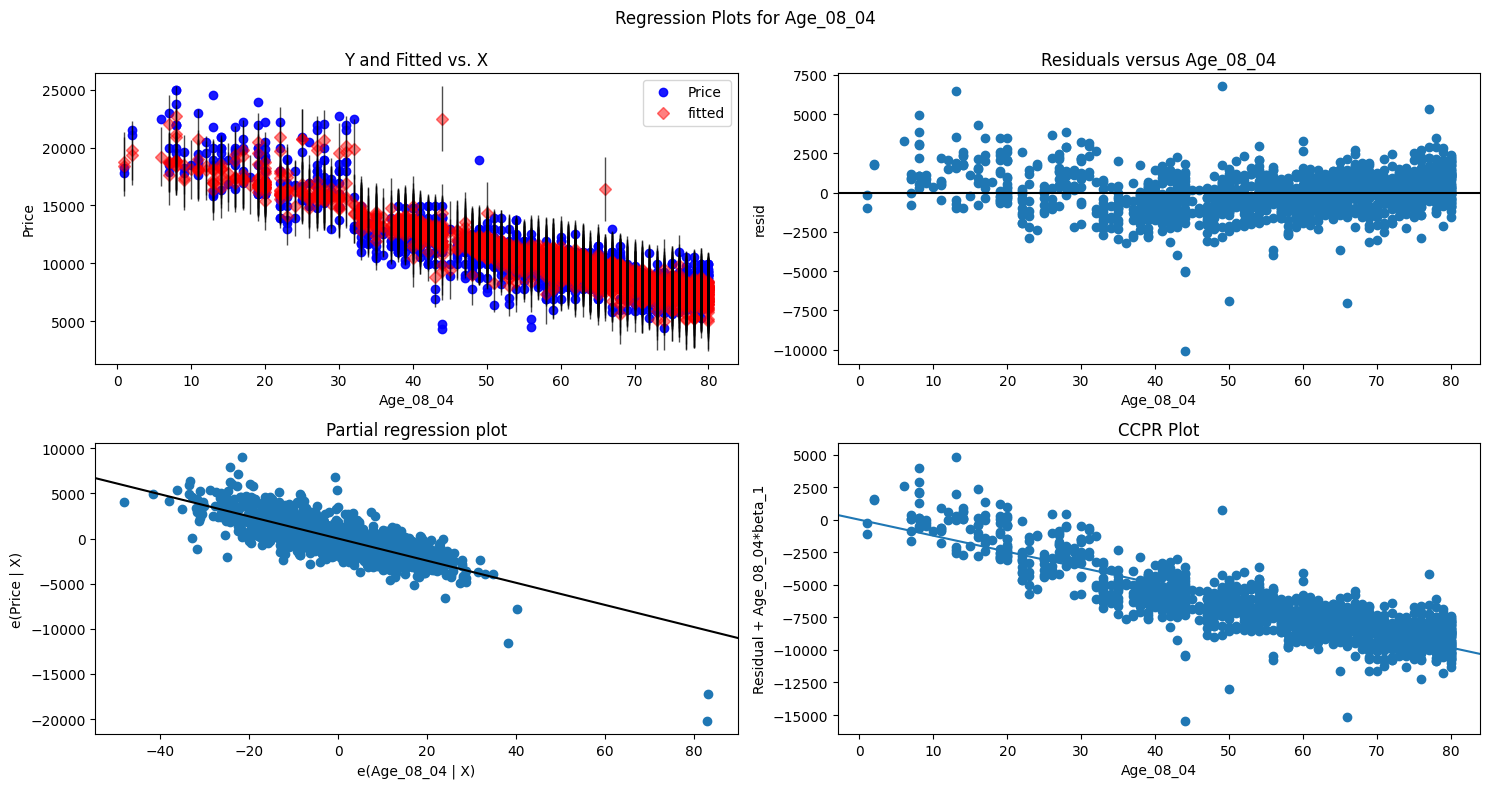

In [161]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_r, "Age_08_04", fig=fig)
plt.show()

eval_env: 1


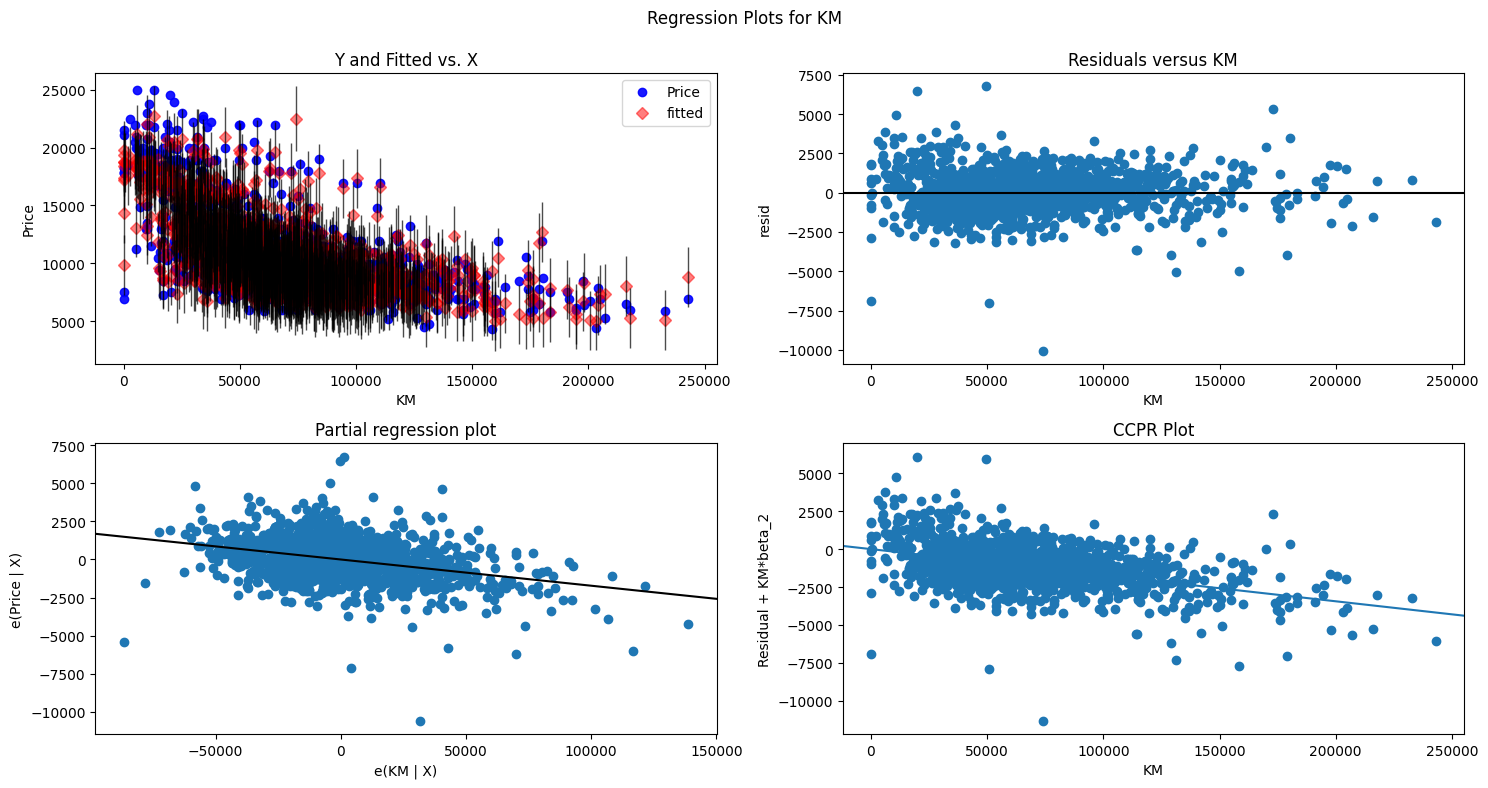

In [162]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_r, "KM", fig=fig)
plt.show()

eval_env: 1


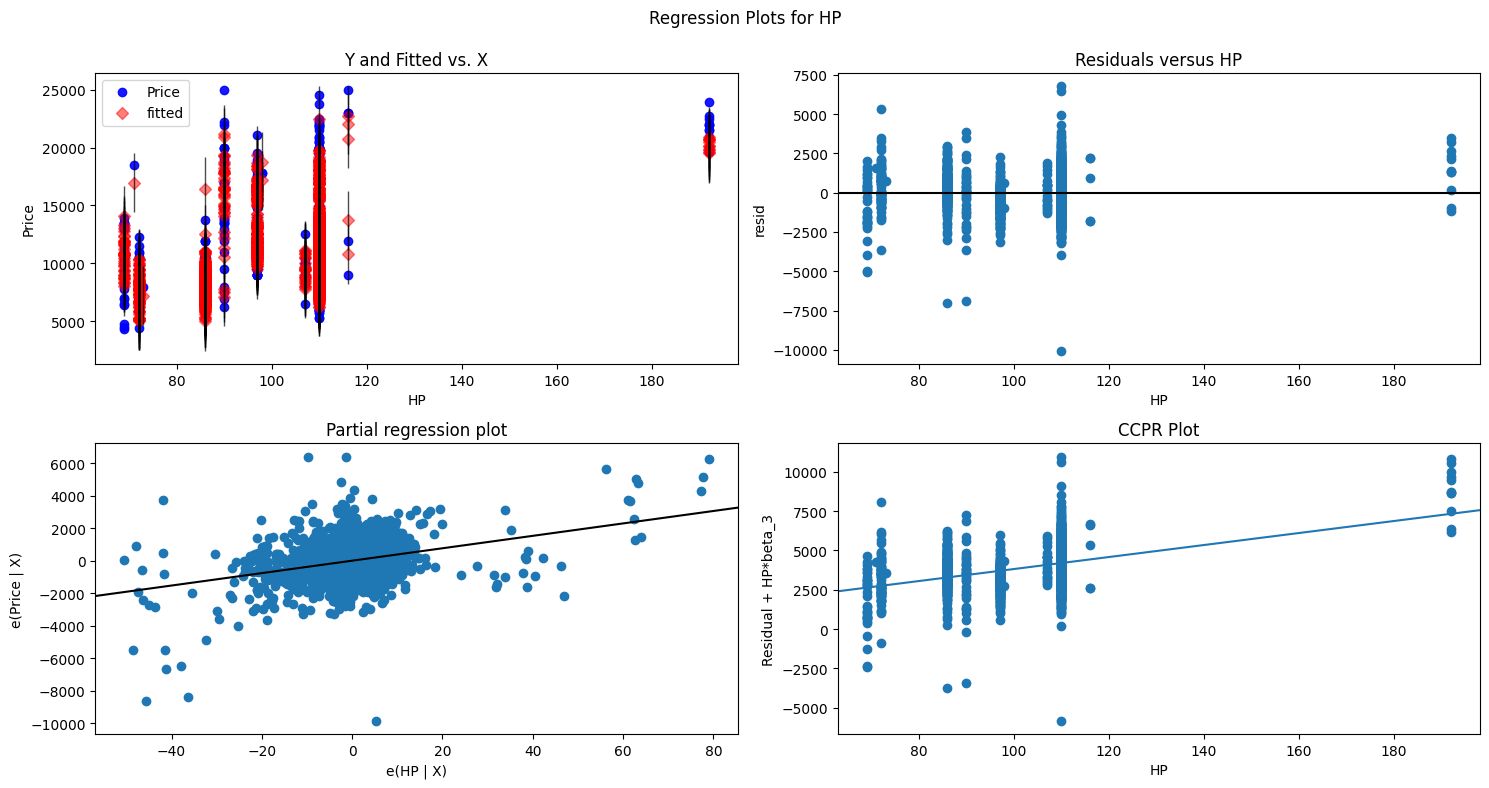

In [163]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_r, "HP", fig=fig)
plt.show()

eval_env: 1


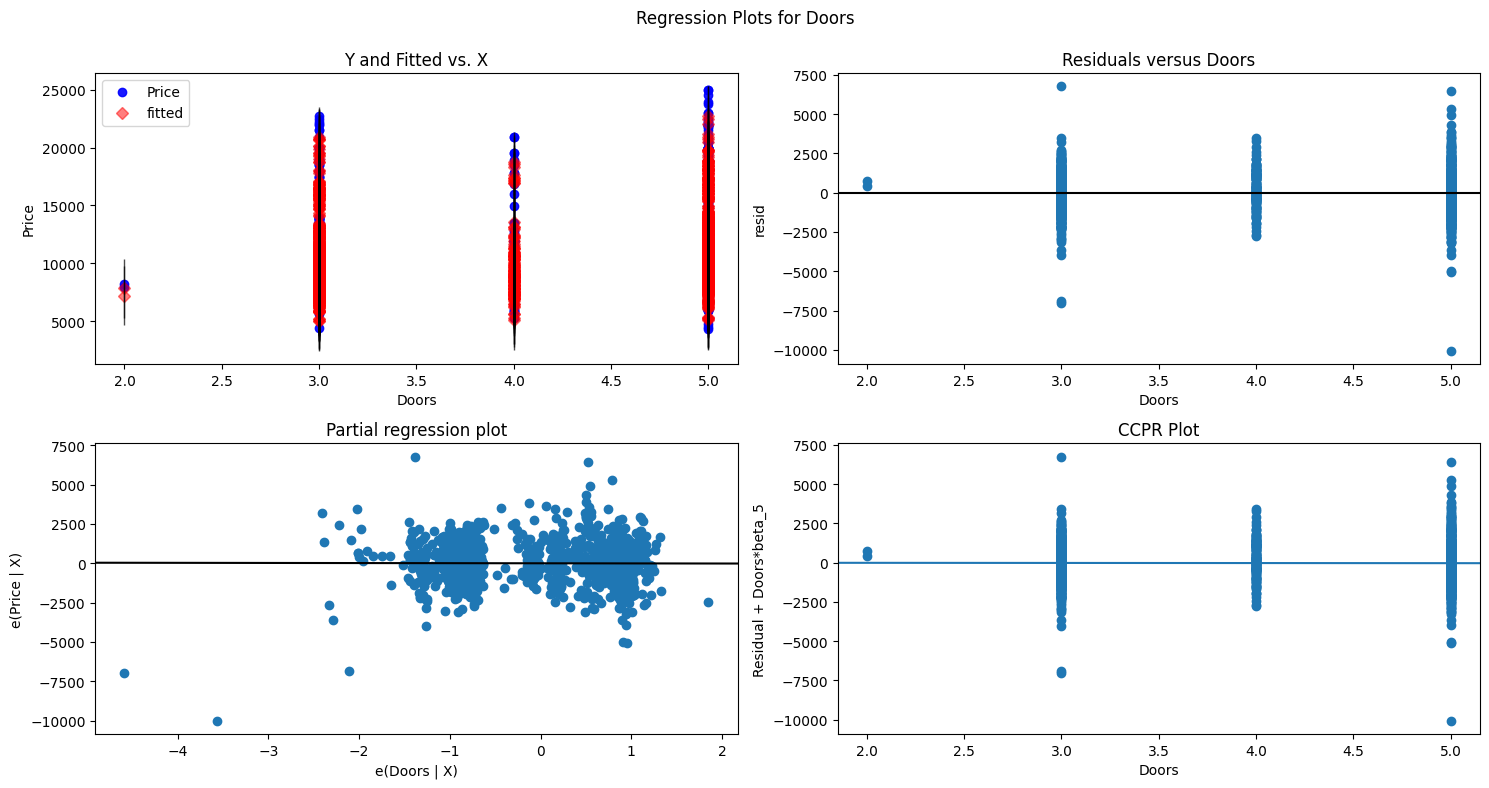

In [164]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_r, "Doors", fig=fig)
plt.show()

eval_env: 1


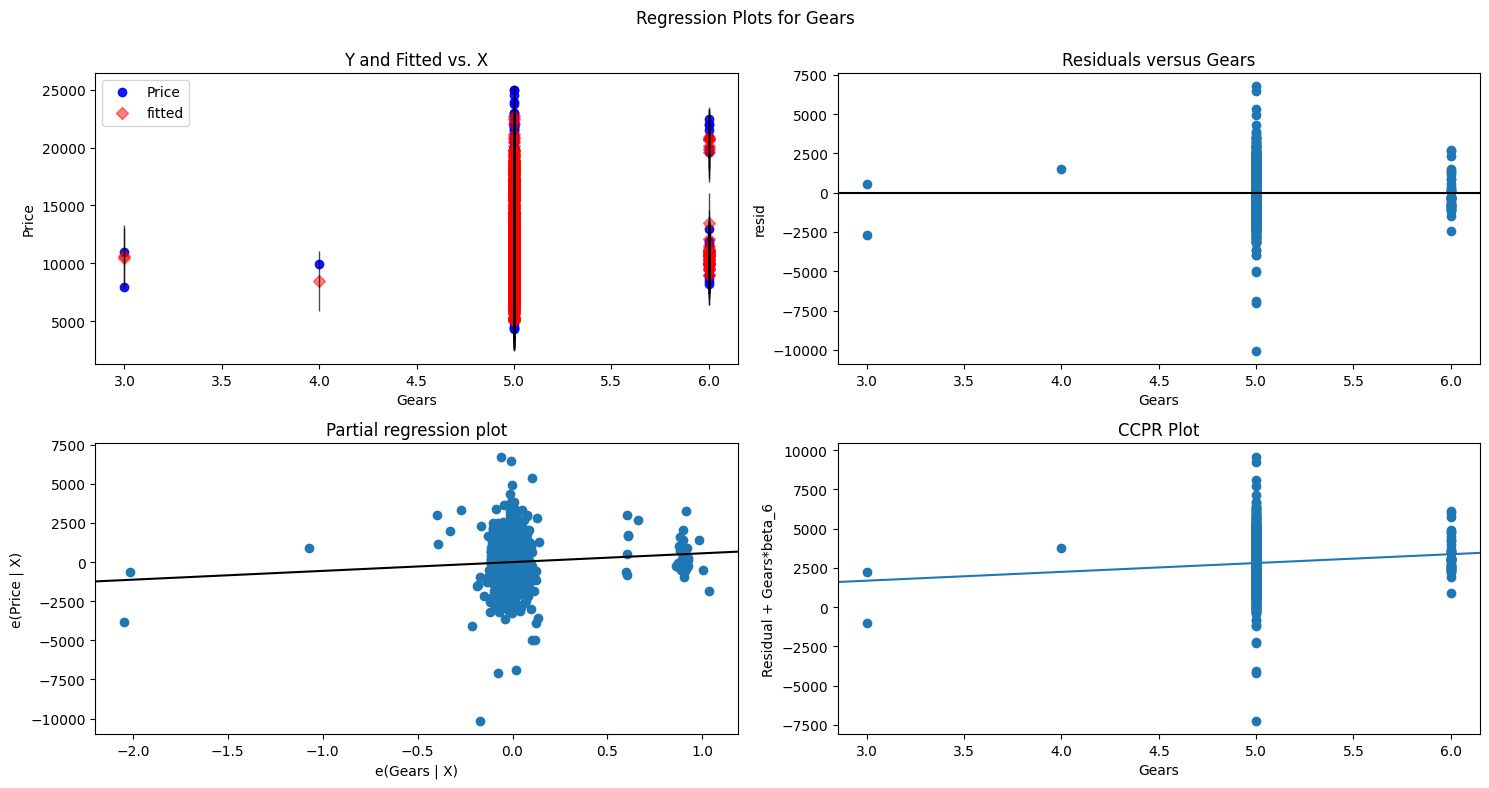

In [165]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_r, "Gears", fig=fig)
plt.show()

eval_env: 1


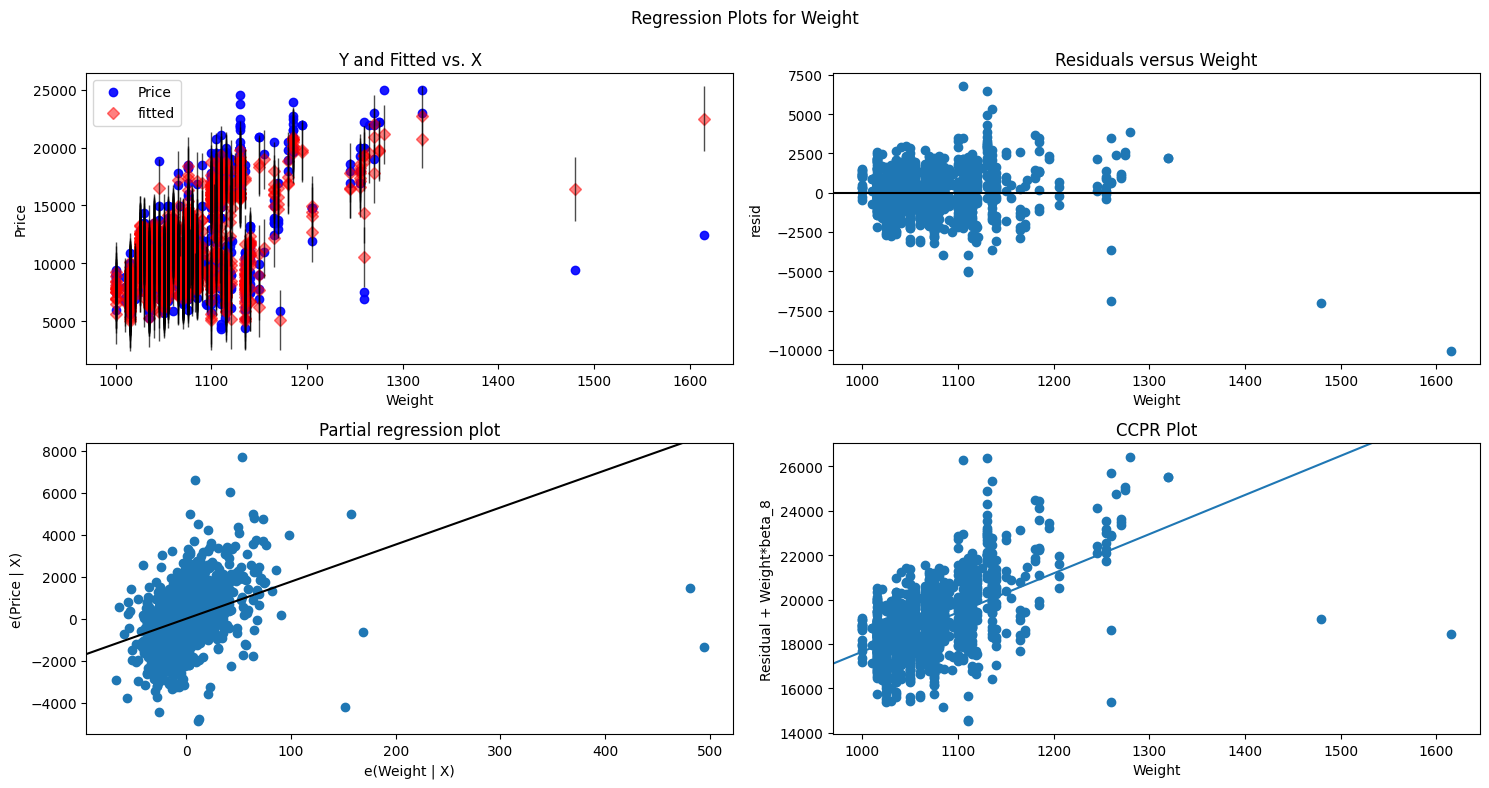

In [166]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_r, "Weight", fig=fig)
plt.show()

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


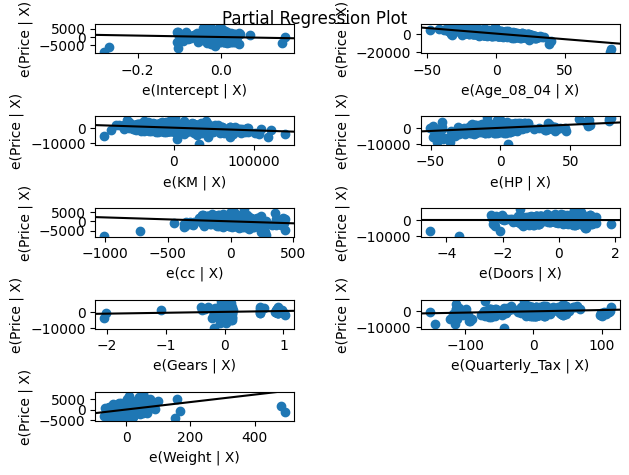

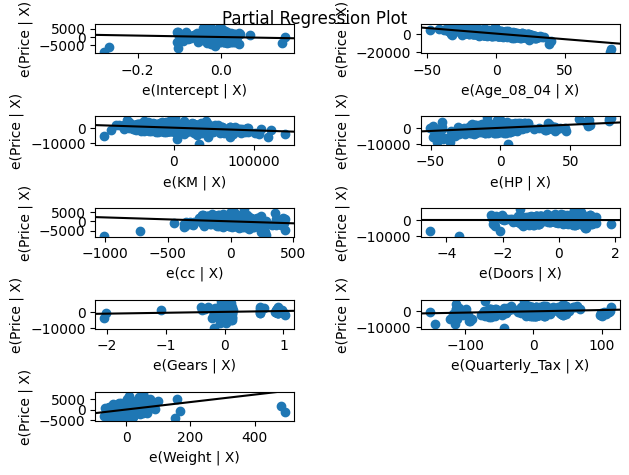

In [167]:
sm.graphics.plot_partregress_grid(model_r)

# **Model Diagnostics**

Dectecting outliers/influencers using cook's distance.

# Iteration 1

In [168]:
model_influence = model_r.get_influence()
(c1, _) = model_influence.cooks_distance

In [169]:
c1

array([6.55641093e-03, 3.46748593e-03, 4.66508736e-03, ...,
       1.97480002e-06, 9.11481704e-04, 9.37724989e-03])

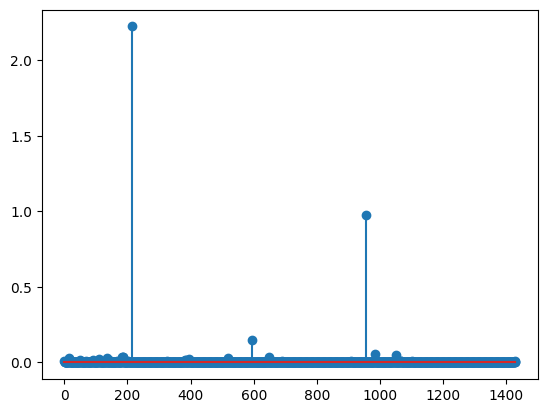

In [170]:
plt.stem(np.arange(len(df)),np.round(c1,3))
plt.show()

In [171]:
np.argmax(c1),np.max(c1)

(215, 2.2248549997444353)

In [172]:
df1=df.drop([215],axis=0).reset_index()

In [173]:
df1 = df1.drop(['index'],axis=1)

In [178]:
df1.shape

(1428, 9)

In [174]:
model_c1=smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = df1).fit()
model_c1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     1109.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        20:31:54   Log-Likelihood:                -12256.
No. Observations:                1428   AIC:                         2.453e+04
Df Residuals:                    1419   BIC:                         2.458e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4225.1015   1404.645     -3.008      0.003   -6980.505   -1469.698
Age_08_04      -122.6952      2.555    -48.021      0.000    -127.707    -117.683
KM               -0.0172      0.001    -13.520      0.000      -0.020      -0.015
HP               38.2645      2.887     13.252      0.000      32.600      43.929
cc               -2.1358      0.311     -6.876      0.000      -2.745      -1.527
Doors            -6.7152     38.925     -0.173      0.863     -83.071      69.641
Gears           561.6412    190.540      2.948      0.003     187.872     935.411
Quarterly_Tax     8.0065      1.420      5.637      0.000       5.220      10.793
Weight           17.6744      1.173     15.064      0.000      15.373      19.976
==============================================================================
Omnibus:                      172.621   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1385.860
Skew:                          -0.239   Prob(JB):                    1.16e-301
Kurtosis:                       7.802   Cond. No.                     3.21e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.21e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Iteration 2

In [175]:
model_influence = model_c1.get_influence()
(c2, _) = model_influence.cooks_distance

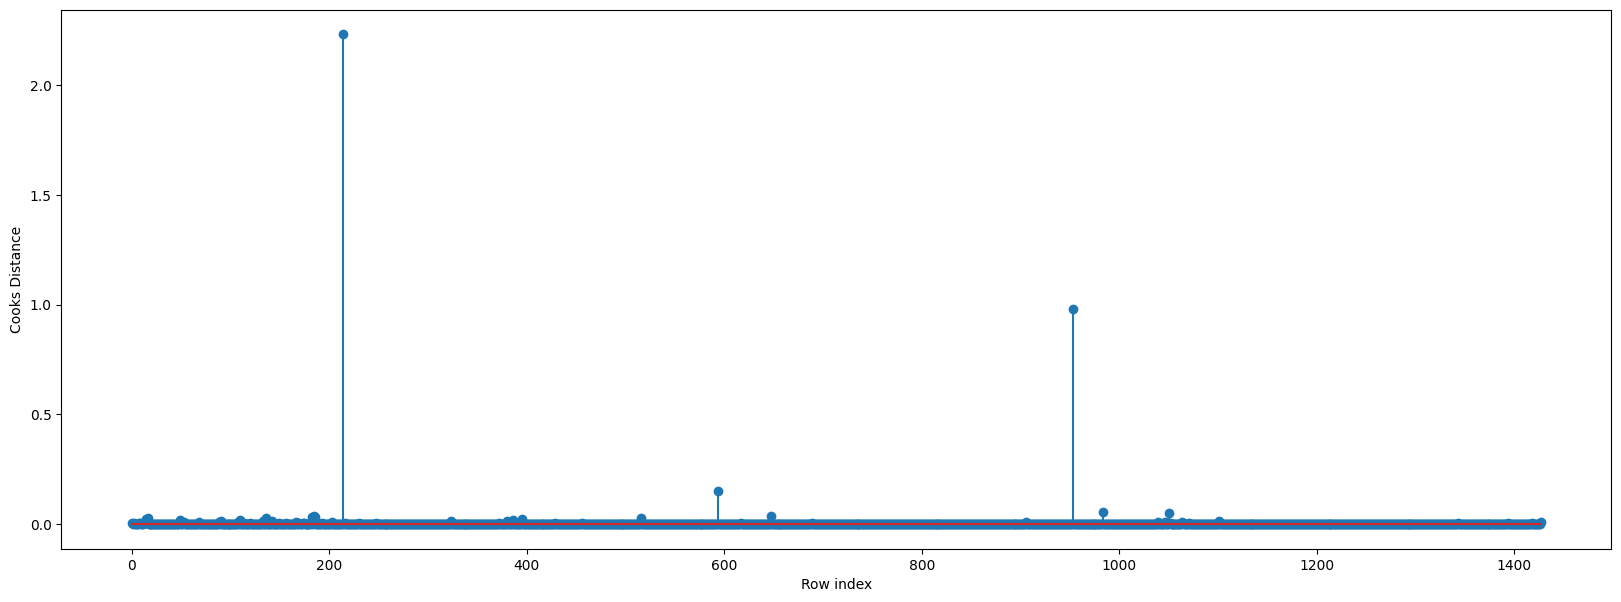

In [176]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df1)), np.round(c2, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [177]:
np.argmax(c2),np.max(c2)

(214, 2.2318982562222285)

In [179]:
df2=df1.drop([214],axis=0).reset_index()

In [180]:
df2 = df2.drop(['index'],axis=1)

In [181]:
df2.shape

(1427, 9)

In [182]:
model_c2=smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = df2).fit()
model_c2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1181.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        20:35:27   Log-Likelihood:                -12208.
No. Observations:                1427   AIC:                         2.443e+04
Df Residuals:                    1418   BIC:                         2.448e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -8415.7760   1444.435     -5.826      0.000   -1.12e+04   -5582.317
Age_08_04      -118.5926      2.528    -46.912      0.000    -123.552    -113.634
KM               -0.0168      0.001    -13.571      0.000      -0.019      -0.014
HP               38.6137      2.810     13.741      0.000      33.101      44.126
cc               -2.8723      0.313     -9.171      0.000      -3.487      -2.258
Doors           -47.4726     38.149     -1.244      0.214    -122.307      27.362
Gears           513.8821    185.491      2.770      0.006     150.016     877.748
Quarterly_Tax     7.3342      1.384      5.298      0.000       4.619      10.050
Weight           22.8293      1.278     17.862      0.000      20.322      25.336
==============================================================================
Omnibus:                      156.535   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1164.214
Skew:                          -0.183   Prob(JB):                    1.56e-253
Kurtosis:                       7.410   Cond. No.                     3.38e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Rsquared value has increased,Doors are still insignificant.**

# Iteration 3

In [184]:
model_influence = model_c2.get_influence()
(c3, _) = model_influence.cooks_distance

In [185]:
c3

array([6.86619233e-03, 3.64657402e-03, 4.87719207e-03, ...,
       2.30669124e-06, 9.61521049e-04, 1.22623768e-02])

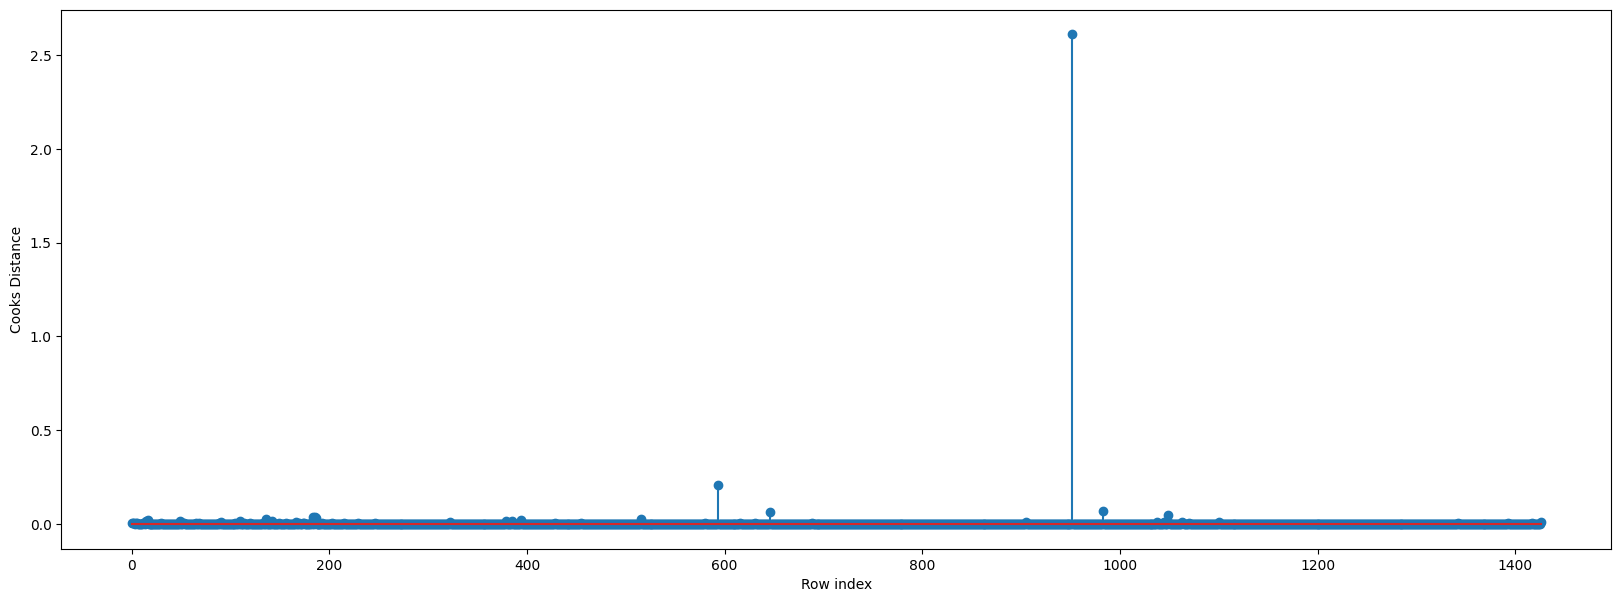

In [188]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df2)), np.round(c3, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [189]:
np.argmax(c3),np.max(c3)

(952, 2.6099419018211534)

In [190]:
df3=df2.drop([952],axis=0).reset_index()

In [191]:
df3 = df3.drop(['index'],axis=1)

In [192]:
df3.shape

(1426, 9)

In [193]:
model_c3=smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = df3).fit()
model_c3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1254.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        20:44:17   Log-Likelihood:                -12162.
No. Observations:                1426   AIC:                         2.434e+04
Df Residuals:                    1417   BIC:                         2.439e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.335e+04   1513.449     -8.820      0.000   -1.63e+04   -1.04e+04
Age_08_04      -113.5885      2.526    -44.963      0.000    -118.544    -108.633
KM               -0.0167      0.001    -13.813      0.000      -0.019      -0.014
HP               36.4778      2.747     13.278      0.000      31.089      41.867
cc               -3.5652      0.315    -11.320      0.000      -4.183      -2.947
Doors          -108.4850     37.789     -2.871      0.004    -182.613     -34.357
Gears           481.6688    180.683      2.666      0.008     127.233     836.104
Quarterly_Tax     5.0090      1.374      3.647      0.000       2.315       7.703
Weight           28.9556      1.425     20.323      0.000      26.161      31.751
==============================================================================
Omnibus:                      115.902   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              649.133
Skew:                          -0.035   Prob(JB):                    1.10e-141
Kurtosis:                       6.305   Cond. No.                     3.64e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.64e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Rsquared value has increased,Doors are now significant as p value of doors is not greater tha 0.05.**

# Iteration 4

In [194]:
model_influence = model_c3.get_influence()
(c4, _) = model_influence.cooks_distance

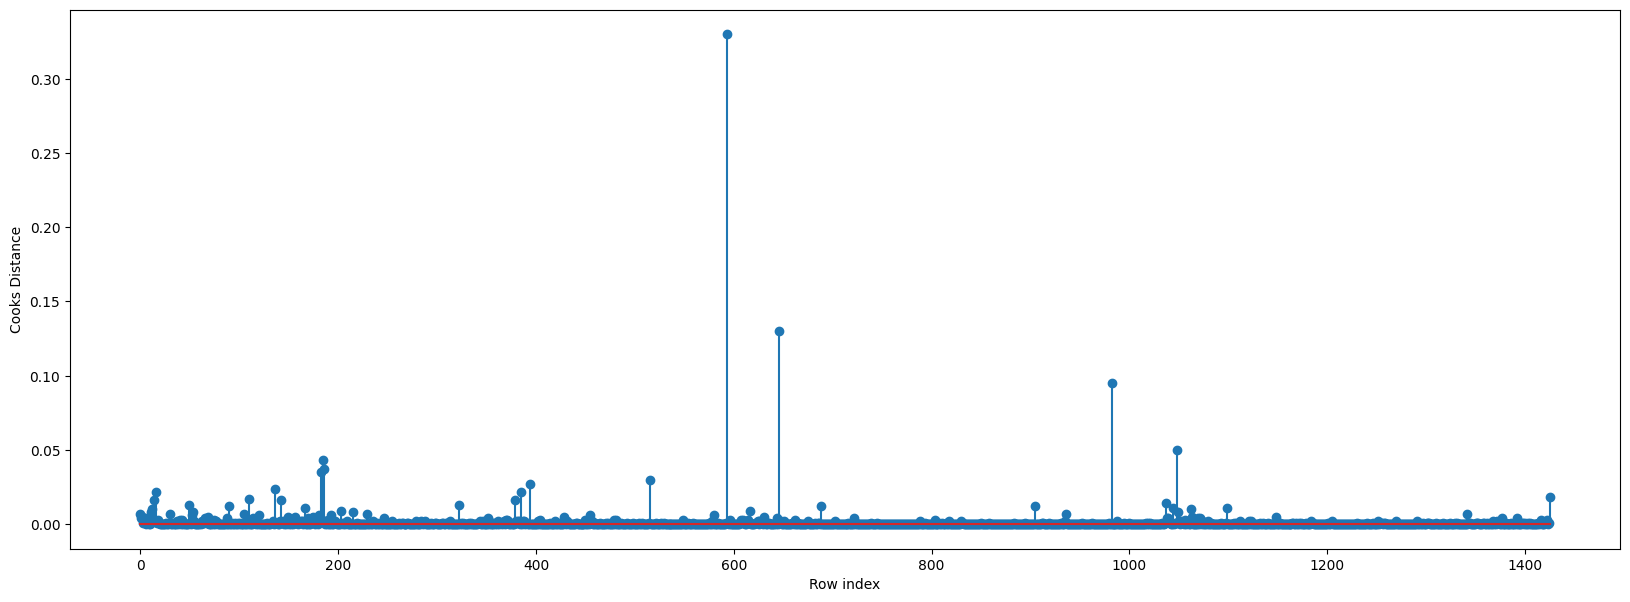

In [195]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df3)), np.round(c4, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [196]:
np.argmax(c4),np.max(c4)

(593, 0.32975439448773947)

In [197]:
df4=df3.drop([593],axis=0).reset_index()

In [198]:
df4 = df4.drop(['index'],axis=1)

In [199]:
df4.shape

(1425, 9)

In [201]:
model_c4=smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = df4).fit()
model_c4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1306.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        20:54:27   Log-Likelihood:                -12128.
No. Observations:                1425   AIC:                         2.427e+04
Df Residuals:                    1416   BIC:                         2.432e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.499e+04   1503.709     -9.970      0.000   -1.79e+04    -1.2e+04
Age_08_04      -111.6954      2.495    -44.767      0.000    -116.590    -106.801
KM               -0.0174      0.001    -14.622      0.000      -0.020      -0.015
HP               34.3008      2.715     12.633      0.000      28.975      39.627
cc               -3.5033      0.309    -11.320      0.000      -4.110      -2.896
Doors          -132.0768     37.260     -3.545      0.000    -205.167     -58.987
Gears           481.0276    177.474      2.710      0.007     132.887     829.168
Quarterly_Tax     3.5553      1.364      2.607      0.009       0.880       6.231
Weight           30.7691      1.422     21.644      0.000      27.980      33.558
==============================================================================
Omnibus:                       77.104   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.334
Skew:                           0.149   Prob(JB):                     8.01e-57
Kurtosis:                       5.065   Cond. No.                     3.68e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Rsquared value has increased,Doors are now significant**

# Iteration 5

In [202]:
model_influence = model_c4.get_influence()
(c5, _) = model_influence.cooks_distance

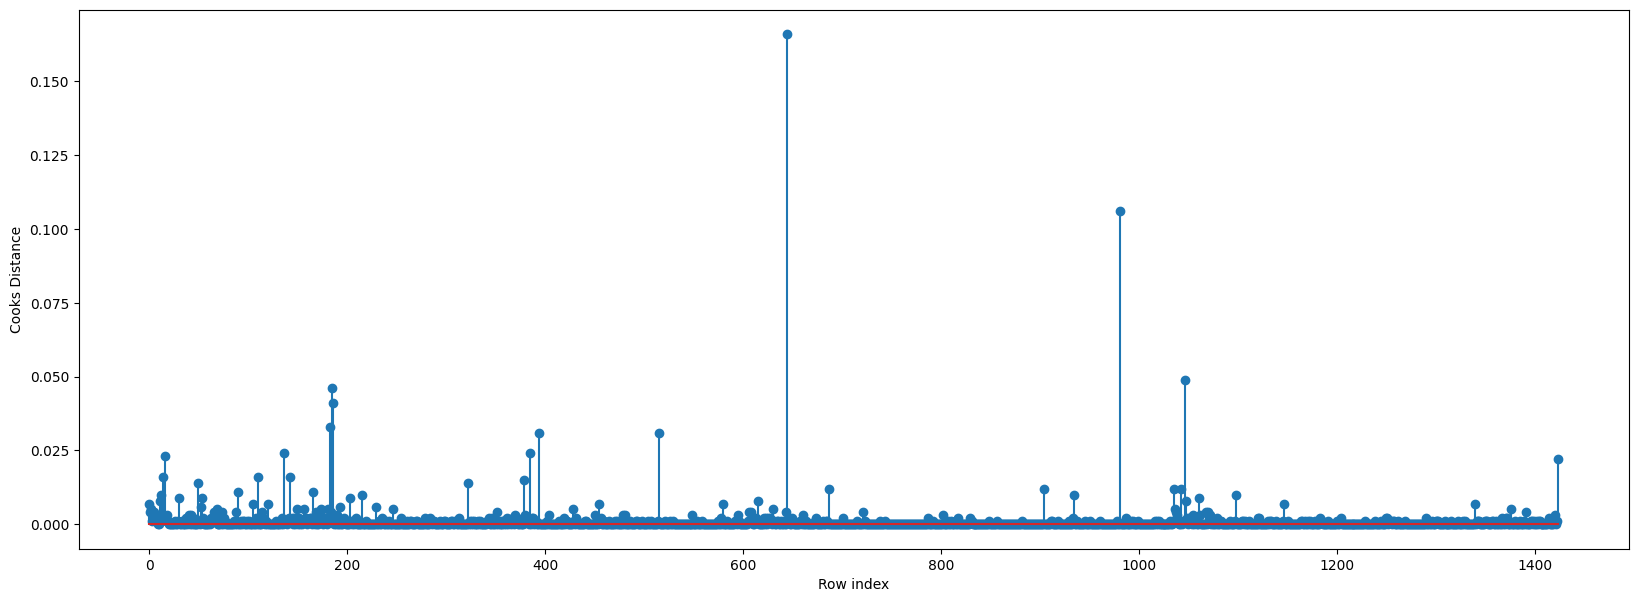

In [203]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df4)), np.round(c5, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [204]:
np.argmax(c5),np.max(c5)

(645, 0.16633480177452534)

In [205]:
df5=df4.drop([645],axis=0).reset_index()

In [206]:
df5 = df5.drop(['index'],axis=1)

In [207]:
df5.shape

(1424, 9)

In [208]:
model_c5=smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = df5).fit()
model_c5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     1331.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        20:59:04   Log-Likelihood:                -12107.
No. Observations:                1424   AIC:                         2.423e+04
Df Residuals:                    1415   BIC:                         2.428e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.627e+04   1511.773    -10.761      0.000   -1.92e+04   -1.33e+04
Age_08_04      -110.6091      2.483    -44.551      0.000    -115.479    -105.739
KM               -0.0173      0.001    -14.689      0.000      -0.020      -0.015
HP               33.1160      2.702     12.257      0.000      27.816      38.416
cc               -3.5145      0.307    -11.455      0.000      -4.116      -2.913
Doors          -150.7666     37.122     -4.061      0.000    -223.586     -77.947
Gears           471.9670    175.953      2.682      0.007     126.811     817.123
Quarterly_Tax     2.4268      1.370      1.771      0.077      -0.261       5.115
Weight           32.2355      1.439     22.406      0.000      29.413      35.058
==============================================================================
Omnibus:                       72.179   Durbin-Watson:                   1.731
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.329
Skew:                           0.201   Prob(JB):                     5.78e-46
Kurtosis:                       4.830   Cond. No.                     3.73e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Rsquared value has increased,Quaterly_Tax are now insignificant.**

# Iteration 6

In [209]:
model_influence = model_c5.get_influence()
(c6, _) = model_influence.cooks_distance

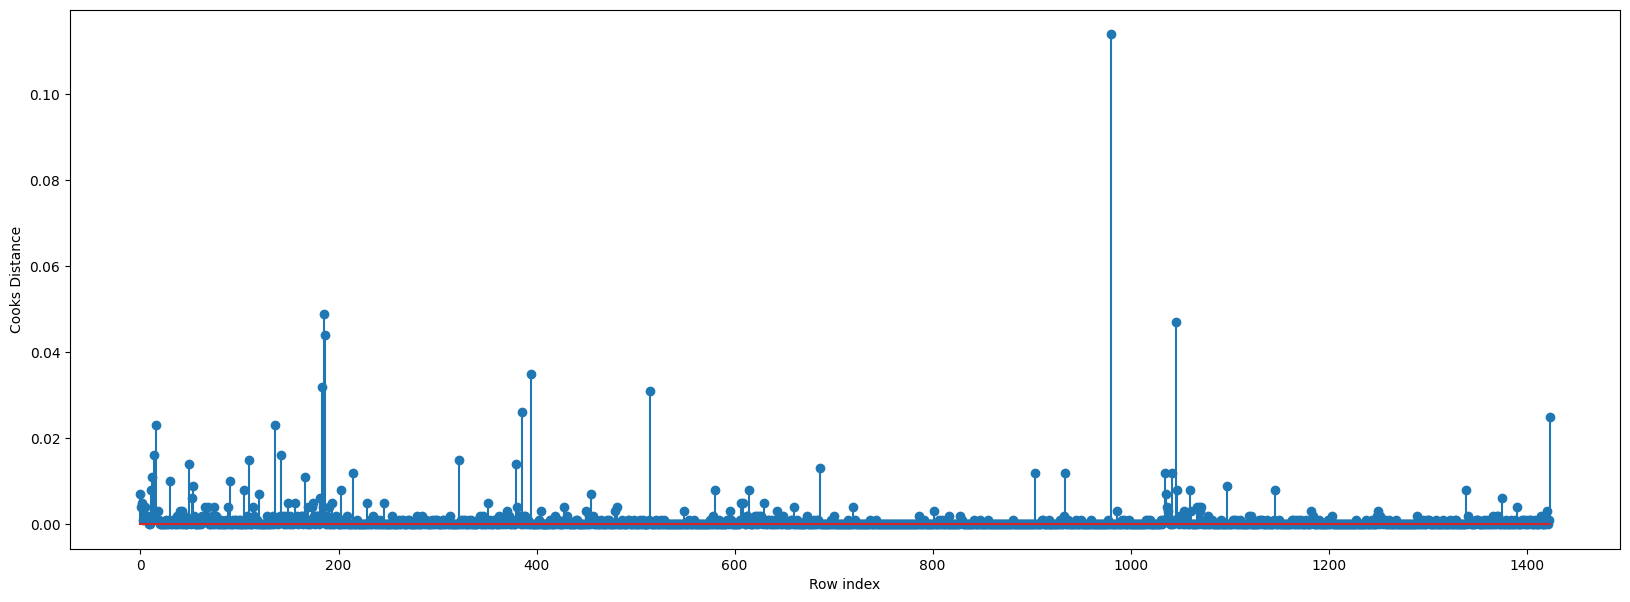

In [210]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df5)), np.round(c6, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [211]:
np.argmax(c6),np.max(c6)

(980, 0.11381407926016364)

In [212]:
df6=df5.drop([980],axis=0).reset_index()

In [213]:
df6 = df6.drop(['index'],axis=1)

In [215]:
df6.shape

(1423, 9)

In [216]:
model_c6=smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data = df6).fit()
model_c6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1339.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        21:05:57   Log-Likelihood:                -12094.
No. Observations:                1423   AIC:                         2.421e+04
Df Residuals:                    1414   BIC:                         2.425e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.572e+04   1517.462    -10.356      0.000   -1.87e+04   -1.27e+04
Age_08_04      -110.2966      2.477    -44.526      0.000    -115.156    -105.437
KM               -0.0173      0.001    -14.721      0.000      -0.020      -0.015
HP               33.6959      2.700     12.481      0.000      28.400      38.992
cc               -3.5448      0.306    -11.584      0.000      -4.145      -2.945
Doors          -160.3960     37.136     -4.319      0.000    -233.243     -87.549
Gears           298.0242    184.042      1.619      0.106     -63.000     659.049
Quarterly_Tax     2.3761      1.366      1.739      0.082      -0.304       5.056
Weight           32.5513      1.438     22.640      0.000      29.731      35.372
==============================================================================
Omnibus:                       73.086   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.004
Skew:                           0.214   Prob(JB):                     6.80e-46
Kurtosis:                       4.824   Cond. No.                     3.75e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Rsquared value has increased,Quaterly_Tax are now insignificant.**

Iteration 7

In [217]:
model_influence = model_c6.get_influence()
(c7, _) = model_influence.cooks_distance

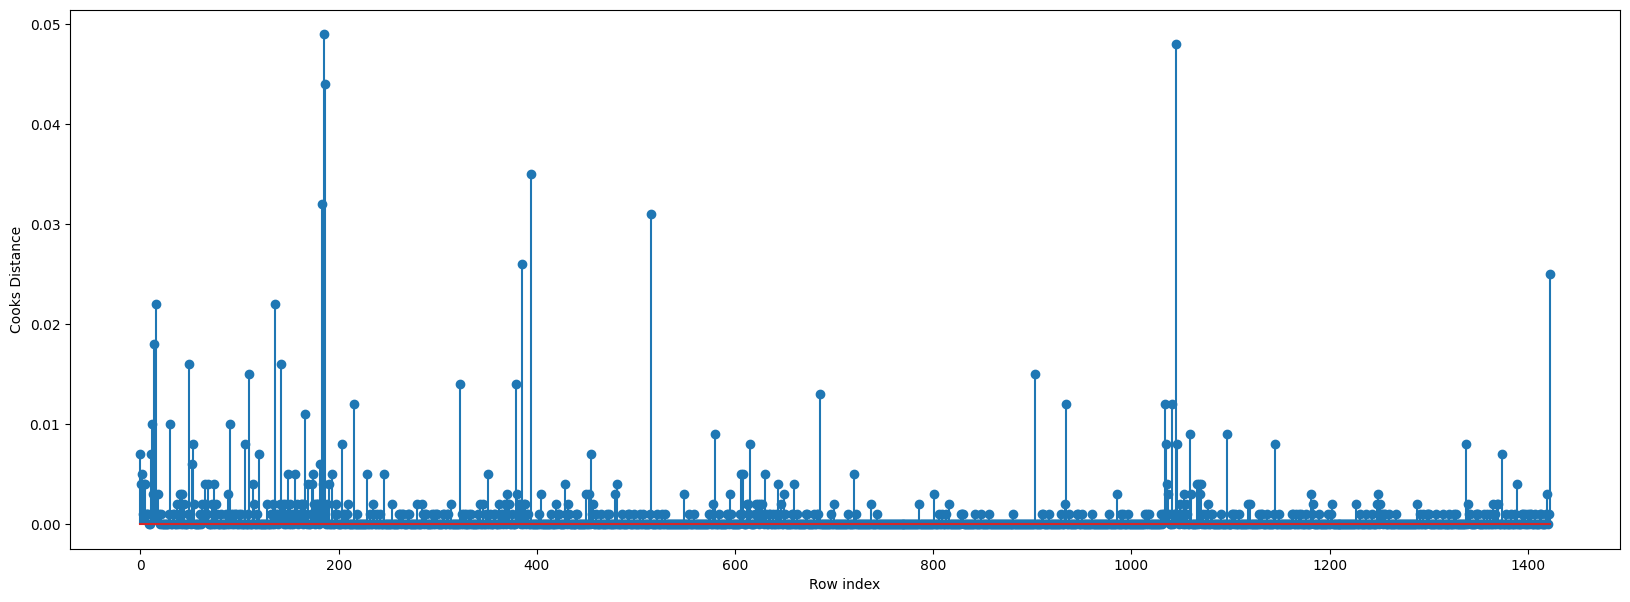

In [218]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df6)), np.round(c7, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

**Since cook's distance of most of the points seems to lie in the same range,hence we can conclude that there are no more outliers/influence points.**

# **Final Model**

**As we have seen in the model dignostics the p value of the Quartely_tax is increased than 0.05 so we can say this feature is insignificant.Hence we can drop Quartely_Tax feature.**

In [219]:
final_model=smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Weight",data = df6).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1528.
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        21:10:54   Log-Likelihood:                -12096.
No. Observations:                1423   AIC:                         2.421e+04
Df Residuals:                    1415   BIC:                         2.425e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.661e+04   1428.847    -11.624      0.000   -1.94e+04   -1.38e+04
Age_08_04   -110.3509      2.479    -44.519      0.000    -115.213    -105.489
KM            -0.0171      0.001    -14.615      0.000      -0.019      -0.015
HP            31.4296      2.366     13.282      0.000      26.788      36.071
cc            -3.3554      0.286    -11.725      0.000      -3.917      -2.794
Doors       -166.0102     37.021     -4.484      0.000    -238.633     -93.387
Gears        313.3446    183.962      1.703      0.089     -47.524     674.213
Weight        33.4569      1.341     24.946      0.000      30.826      36.088
==============================================================================
Omnibus:                       70.941   Durbin-Watson:                   1.744
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.270
Skew:                           0.165   Prob(JB):                     1.80e-47
Kurtosis:                       4.876   Cond. No.                     3.53e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **So this is our final model which gives us 88.3% accuracy/rsquared value.**